## Exploring Seattle Weather: It's snowing in November???
- Final Project Plan for UW HCDE 512 class 
- By: Libby Montague 
- Date: 11/5/2017 

### Motivation/Introduction
    Climate change is hotly discussed in the global media (1). The change on a global level also impacts the Pacific Northwest (2). There are studies on a global and regional level. Scientist and citizen scientists can explore weather changes on NOAA weather (3). In this study, these global indicators will be examined in the Seattle area. In conjunction with previous research, this study aims to better understand these climate changes. By analyzing observed weather patterns in the Seattle area, this study aims to understand the potentially changing weather patterns.  
    This study will follow human centered data science principles. The research methods will be reproducible and replicable. There will be sufficient information to gather the same data or complete the same analyses on different data. The data is available through NOAA. 
    Additionally, the biases in the data will be considered. The data are sourced from instruments that measure weather data. Different stations will be compared and the differences between them will be considered. There may also be biases in where the stations are located. 
    Finally, the impact to human life must be considered. When scientific studies are published, they are interpreted and portrayed in the media. For instance, the way that the media portrayed the health benefits of coconut oil had to be corrected by the American Heart Association because of misinterpretation of a scientific study (4,5). Additionally, Cliff Mass, a University of Washington based meterologist, notes that the media portrays extremes of weather changes and doesn't accurately represent the scientific studies. Therefore, this study will be presented in an understandable way that clearly states assumptions and reduces misinterpretation. 
    In Third National Climate Assessment, there are 10 climate change indicators (see figure below) (6). These indicators are on a global scale. This study will examine three of the indicators 'Temperature Over Land,' 'Air Temperature Near Surface', and 'Snow Cover' in the Seattle Area. 

#### References:
1. (2017). Syria to join Paris accord, isolating US. BBC News. http://www.bbc.com/news/world-middle-east-41904650?intlink_from_url=http://www.bbc.com/news/topics/e6369e45-f838-49cc-b5ac-857ed182e549/climate-change&link_location=live-reporting-story
2. Mass, C. (2017). Cliff Mass Weather and Climate Blog: How Will Human-Forced Climate Change Affect the Pacific Northwest? http://cliffmass.blogspot.com/2017/08/how-will-human-forced-climate-change.html 
3. https://www.ncdc.noaa.gov/cag/mapping/global
4. May, A. (2017). Coconut oil isn’t healthy. It’s never been healthy. USA TODAY. https://www.usatoday.com/story/news/nation-now/2017/06/16/coconut-oil-isnt-healthy-its-never-been-healthy/402719001/
5. Sacks, F.M., Lichtenstein, A.H., Wu, J.H.Y., Appel, L.J., Creager, M.A., Kris-Etherton, P.M., Miller, M., Rimm, E.B., Rudel, L.L., Robinson, J.G., et al. (2017). Dietary Fats and Cardiovascular Disease: A Presidential Advisory From the American Heart Association. Circulation CIR.0000000000000510.http://circ.ahajournals.org/content/early/2017/06/15/CIR.0000000000000510
6. (2014). Climate Change Impacts in the United States: The Third National Climate Assessment (Washington, DC: U.S. Global Change Research Program). http://nca2014.globalchange.gov 

In [29]:
%%html
<img src = "C:/Users/Libby/Documents/DATA_512/ch02_html_2d17883a.png", width=700, height=700>

### Research Questions: 
- How do Seattle's hourly temperatures differ from the 30 year average (citation)?
- What are the seasonal trends in Seattle's daily temperatures? How have they changed?
- How different are weather stations around Seattle? Are there any changes in these differences over time?
- How often does Seattle get snow? Have the number of occurances changed over time? 
- How much rain does Seattle get? Has the amount changed over time?

### Hypothesis:
- Seattle's hourly temperatures will have a larger difference from the 30 year average in the past 10 years. 
- There will be seasonable trends in daily temperatures.
- The seasonable trends will be more extreme in the past 10 years. 
- There will be some difference in daily temperatures at weather stations around Seattle. 
- The differences observed (daily temperature variation from 30 year average and difference in seasonality) will not differ accross weather stations. 
- The number of days with snow is increasing. 
- The amount of rain that Seattle gets is decreasing. 

### Data Sources: - include licensing
    The data will be sourced from the NOAA Daily Summaries. The data is free and the citation is included below along with links to the documentation. There are options to download data for specific timeframes and stations or the data can be downloaded from an API (see citations below). Both methods are still being considered for this study.
    The data includes daily values for components including 5 main components: PRCP (percipitation), SNOW (snowfall), SNWD (snow depth), TMAX (max temperature), TMIN (min temperature) (pdf from NOAA). These 5 components will be sufficient to answer the reserach questions highlighted above. Additionally, there is geographical information about each of the stations. 

#### Brief Data Exploration:

In [8]:
# import libraries
import pandas as pd
import numpy as nm
# store the working directory 
working_folder='{insert your working directory}'

- List the first couple stations in the dataset:

In [7]:
# stations cities - doesn't quit work - may need regularized 
weather_data=pd.read_csv(working_folder+'{insert the name of your .csv file with the daily summaries data}')
nm.unique(weather_data.NAME)[0:10]

array(['AUBURN 8.2 SE, WA US', 'BAINBRIDGE ISLAND 2.4 SW, WA US',
       'BAINBRIDGE ISLAND 2.6 NNW, WA US',
       'BAINBRIDGE ISLAND 2.6 NW, WA US', 'BELFAIR 3.2 WSW, WA US',
       'BELLEVUE 1.1 SE, WA US', 'BELLEVUE 1.8 W, WA US',
       'BELLEVUE 2.3 SSE, WA US', 'BOTHELL 4.9 NNW, WA US',
       'BOTHELL 5.4 N, WA US'], dtype=object)

- Start to plot the data. Explore some of the numerical data. The perceptation and snow are skewed to the left. This will need to be considered during the analysis.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024EC1D577F0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000024EC1E4F518>]], dtype=object)

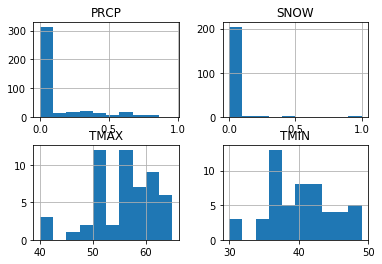

In [28]:
# look at the distribution of percepitation
# issue with the labels
## plot within the jupyter notebook
%matplotlib inline
weather_data.loc[:,('PRCP','SNOW','TMAX','TMIN')].hist()

- Now look at the amount of missing data in one of the columns. There is a lot of missing maximum temperature data. These missing values will need to be handled during the analysis. 

In [69]:
# lots of missing data - need to decide what to do with... 
# specifically max temperature 
per_na=round(nm.mean(nm.isnan(weather_data.TMAX)),2)*100
'Missing tempature max values in the dataset: '+str(per_na)+'%'

'Missing tempature max values in the dataset: 87.0%'

### Additional Information about the Data:
- API access for Daily Summaries: https://www.ncdc.noaa.gov/cdo-web/webservices/v2#locations
- Download access for Daily Summaries: https://www.ncdc.noaa.gov/cdo-web/search?datasetid=GHCND
- Documentation about the Daily Summaries: https://www1.ncdc.noaa.gov/pub/data/cdo/documentation/GHCND_documentation.pdf
- Additional documentation about the Daily Summaries: https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt
- Citation
    - Menne, M.J., I. Durre, B. Korzeniewski, S. McNeal, K. Thomas, X. Yin, S. Anthony, R. Ray, R.S. Vose, B.E.Gleason, and T.G. Houston, 2012: Global Historical Climatology Network - Daily (GHCN-Daily), Version 3.22. NOAA National Climatic Data Center. http://doi.org/10.7289/V5D21VHZ 11/7/2017.

### Analytical Methods: 

1. How do Seattle's hourly temperatures differ from the 30 year average (citation)?
    - For this analysis, I will calculate the average daily minimum and maximum temperature for each day across the past 30 days. I will start with one representative station. These values will then be compared to the current year's daily minimum and maximum values. 
    - Additionally, I will explore wether the 30 year average is an accurate representation of the 'normal' weather. 
2. What are the seasonal trends in Seattle's daily temperatures? How have they changed?
    - I will compare seasonal weather trends to previous years. For this analysis, I will start with a representative station. 
3. How different are weather stations around Seattle? Are there any changes in these differences over time?
    - I will answer the last two questions for different stations around the Seattle area. 
    - In this analysis, I will also consider biases in locations of stations. 
4. How often does Seattle get snow? Have the number of occurances changed over time?
    - I will count occurances of snow in Seattle over time. Depending on the result of question 3, I may look at multiple or one station. 
5. How much rain does Seattle get? Has the amount changed over time?
    - For this last analysis, I will consider the amount of percipitation over time. [Comparison with the Cliff Mass article]

### Limitations: 
- This analysis is completed by a data scientist not a meterologist. 
- The conclusions are limited to a assumptions made. They are also limited by the data available. 
- The analysis completed are merely attempting to understand the past, they give no predictions about the future. 